<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica24RegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Herrera Castro Jonathan Adrian
*   Matrícula: 255497

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## ***Parte 1: Carga de datos y bibliotecas***
**1. Importa las bibliotecas necesarias**


In [55]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Carga el archivo `advertising.csv`**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Unidad04/advertising.csv', engine="python")

**3. Muestra las primeras filas del dataframe**

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**4. Describe estadísticamente las variables**

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
TV_moda = df['TV'].mode().iloc[0]
Radio_moda = df['Radio'].mode().iloc[0]
Newspaper_moda = df['Newspaper'].mode().iloc[0]
Sales_moda = df['Sales'].mode().iloc[0]

TV_mediana = df['TV'].median()
Radio_mediana = df['Radio'].median()
Newspaper_mediana = df['Newspaper'].median()
Sales_mediana = df['Sales'].median()

TV_Rango = df['TV'].max() - df['TV'].min()
Radio_Rango = df['Radio'].max() - df['Radio'].min()
Newspaper_Rango = df['Newspaper'].max() - df['Newspaper'].min()
Sales_Rango = df['Sales'].max() - df['Sales'].min()

TV_varianza = df['TV'].var()
Radio_varianza = df['Radio'].var()
Newspaper_varianza = df['Newspaper'].var()
Sales_varianza = df['Sales'].var()

print("Moda:")
print("TV:", TV_moda)
print("Radio:", Radio_moda)
print("Newspaper:", Newspaper_moda)
print("Sales:", Sales_moda)

print("\n")

print("Mediana:")
print("TV:", TV_mediana)
print("Radio:", Radio_mediana)
print("Newspaper:", Newspaper_mediana)
print("Sales:", Sales_mediana)

print("\n")

print("Rango:")
print("TV:", TV_Rango)
print("Radio:", Radio_Rango)
print("Newspaper:", Newspaper_Rango)
print("Sales:", Sales_Rango)

print("\n")

print("Varianza:")
print(f"TV: {TV_varianza:.4f}")
print(f"Radio: {Radio_varianza:.4f}")
print(f"Newspaper: {Newspaper_varianza:.4f}")
print(f"Sales: {Sales_varianza:.4f}")

Moda:
TV: 17.2
Radio: 4.1
Newspaper: 8.7
Sales: 11.9


Mediana:
TV: 149.75
Radio: 22.9
Newspaper: 25.75
Sales: 16.0


Rango:
TV: 295.7
Radio: 49.6
Newspaper: 113.7
Sales: 25.4


Varianza:
TV: 7370.9499
Radio: 220.4277
Newspaper: 474.3083
Sales: 27.9195


In [12]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [13]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


## ***Parte 2: Análisis exploratorio de los datos***


### **2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes**

**1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot**

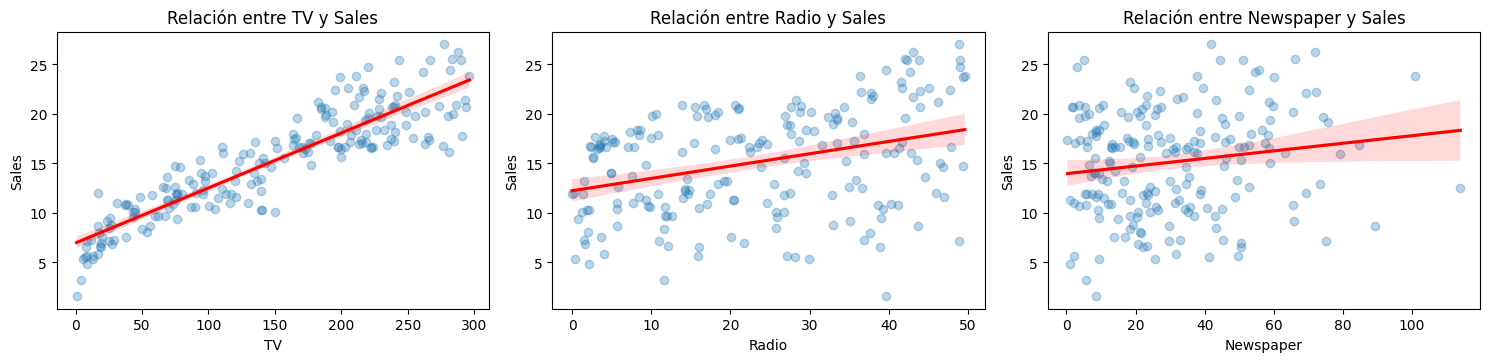

In [15]:
X = df.drop(columns='Sales')
y = df['Sales']

plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x = X[col], y = y, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
    plt.title(f"Relación entre {col} y Sales")

plt.tight_layout()
plt.show()

**2. Interpreta visualmente la relación entre variables**

La relación entre TV y Sales es tendencia positiva y fuerte, lo que sugiere que es un buen predictor. A mayor raiting, más ventas.

La relación entre Radio y Sales es tendencia positiva pero dispersa, existe una gran dispersión de datos. Debe analizar con cuidado.

La relación entre Newspaper y Sales es positiva sin embargo no parecer ser un buen predictor debido a que es prácticamente plana y va hacia la baja.

### **2.2: Correlación entre variables**


**1. Calcula la matriz de correlación**

In [19]:
correlacion = df.corr()
print(correlacion)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


**2. Visualízala con un heatmap**

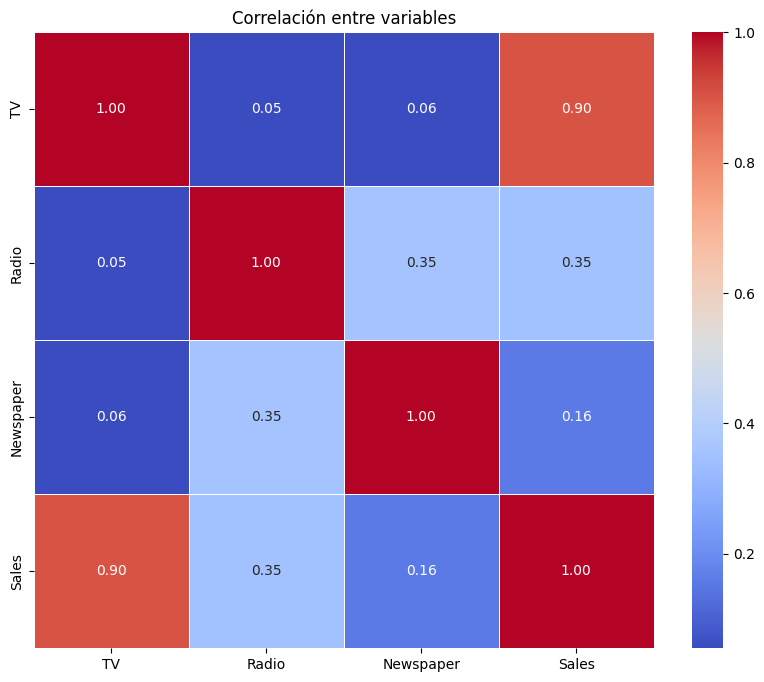

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Correlación entre variables")
plt.show()

**3. Responde: ¿Qué variables están más correlacionadas con Sales? ¿Hay correlación alta entre predictores?**

Las variables que están altamente correlacionadas son TV y Sales y según los resultados, no hay una correlación alta entre los predictores.

## ***Parte 3. Multicolinealidad***


**1. Calcula el VIF (Variance Inflation Factor) para cada predictor**

In [22]:
X = add_constant(df.drop(columns=['Sales']))
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


**2. Crea un diagrama de barras para mostrar el VIF**

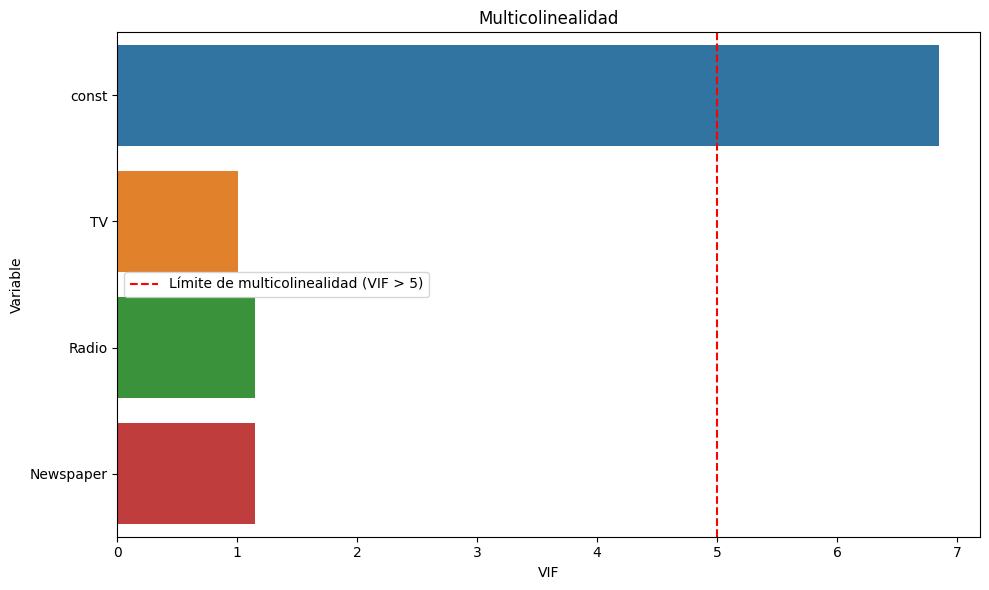

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, hue='Variable', legend=False)
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF')
plt.title('Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()

**3. Interpreta si hay multicolinealidad:**


*   **¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?**

      Según la gráfica, no hay variables con VIF mayor a 5 y mayor a 10.

*   **¿Qué implicaciones tiene esto para el modelo?**

      Es poco probable que haya inestabilidad en el modelo, como en los coeficientes, varianzas, identificación de predictores y las prediciones sean confiables.


## ***Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación***

###**4.1 Entrenamiento del Modelo (Todas las Variables Independientes)**

**1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes**

In [30]:
scaler = StandardScaler()
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

**2. Imprime el intercepto y los coeficientes del modelo**

In [32]:
coeficientes = model.coef_
intercepto = model.intercept_
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

print("\n")

ecuacion = f"Sales = {intercepto}"
for i, coef in enumerate(coeficientes):
    ecuacion += f"+ ({coef} * {X.columns[i]}) "

print("Modelo con los coeficientes:", ecuacion)

Coeficientes: [4.66270025 1.58465027 0.00729187]
Intercepto: 15.130500000000001


Ecuación del modelo: Sales = 15.130500000000001+ (4.662700245086694 * TV) + (1.5846502733236385 * Radio) + (0.0072918683037688226 * Newspaper) 


**3. Interpreta cada uno: ¿Qué significa cada uno de los coeficientes en términos de ventas?**

En términos de venta, quiere decir que habrá más ganancia.

### **4.2 Normalidad de los residuos**


**1. Calcula los residuos: residuos = y - y_pred**

In [33]:
y_pred = model.predict(X_scaled)
residuos = y - y_pred

**2. Grafica un histograma con KDE de los residuos**

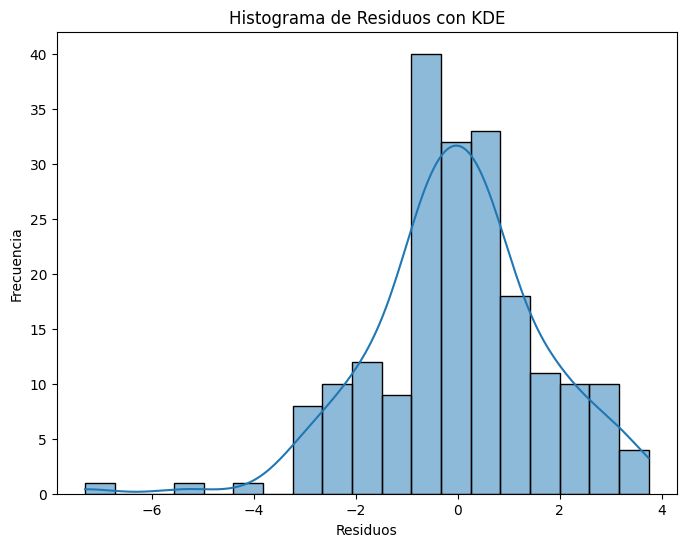

In [58]:
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True)
plt.title('Histograma de Residuos con KDE')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

**3. ¿Los residuos parecen distribuirse normalmente?**

A simple vista podría decirse que están distribuidos normalmente sin embargo, en términos númericos podría que la distribución no es normal.

### ***4.3. Homocedasticidad***

**1. Grafica los residuos contra los valores predichos**

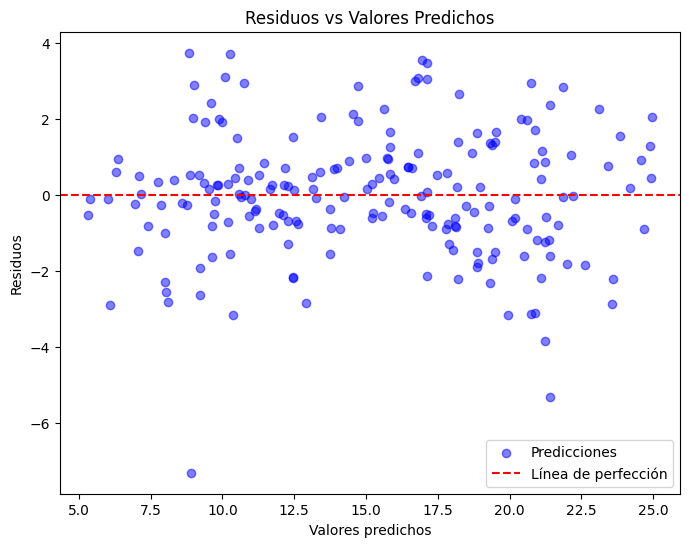

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.5, color='blue', label='Predicciones')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de perfección')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.legend()
plt.show()

**2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?**

Observo patrones y los residuos están dispersos aleatoriamente.

### **4.4 Q-Q Plot**

**1. Graficar el Q-Q Plot**

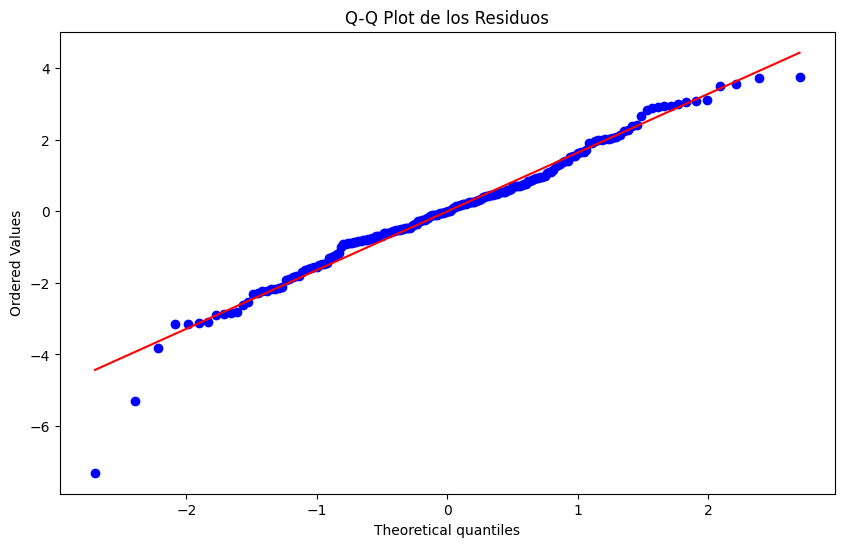

In [49]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos")
plt.show()

**2. Interpreta el gráfico:**

**a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal**

Los puntos del gráfico Q-Q Plot no se alinean perfectamente sobre la línea diagonal, lo que sugiere que los residuos no siguen una distribución normal perfecta.


**b) Desviaciones sistemáticas indican asimetría o colas pesadas**

 Las desviaciones observadas en el gráfico Q-Q Plot sugieren la presencia de asimetría o colas pesadas en la distribución de los residuos.


### **4.5. Evaluación del Modelo**



**1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)**

In [52]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 2.7060
RMSE: 1.6450
R²: 0.9026


**2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?**
         Indica un ajuste razonable bueno para el modelo.

### **4.6. Visualización de Predicciones**


**1. Crea un gráfico comparando Sales reales vs Sales predichas**

**2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste**

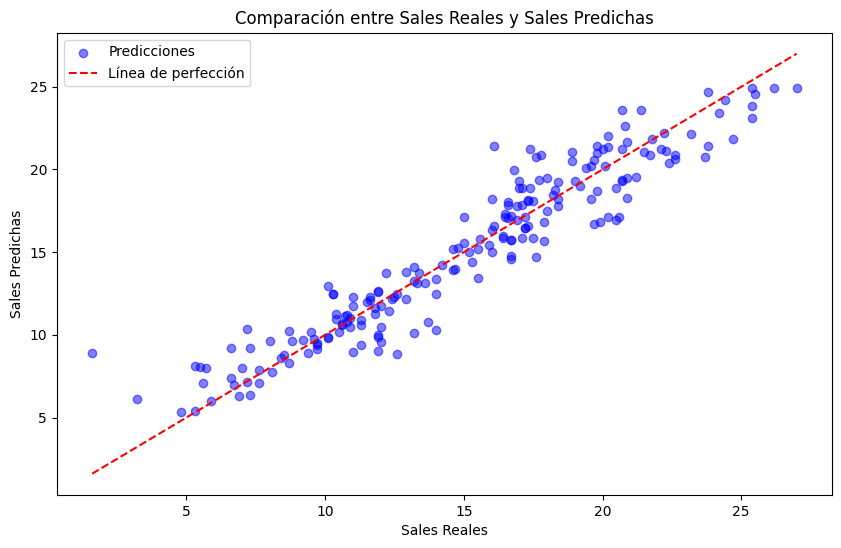

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de perfección')
plt.title("Comparación entre Sales Reales y Sales Predichas")
plt.xlabel("Sales Reales")
plt.ylabel("Sales Predichas")
plt.legend()
plt.show()

**3. ¿Qué observas? ¿Qué información puedes obtener de esta gráfica?**

Se observa que hay tendencia positiva entre lo real y lo predicho y en esta gráfica se puede obtener información sobre la similitud que hay entre las ventas reales y las ventas predichas,

### **4.7 Verificar el impacto de los atributos en el modelo**



**1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p**

In [56]:
X_scaled_with_constant = sm.add_constant(X_scaled)
model_sm = sm.OLS(y, X_scaled_with_constant).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           8.13e-99
Time:                        06:02:51   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    128.771      0.0

**2. Interpreta los resultados:**

**Observa los valores P>|t| en la tabla de salida**

**¿Qué variables tienen p-value menores a 0.05?**

Según la tabla, no hay variables con p-value menor a 0.05.

**¿Cuál es la conclusión sobre esas variables?**

La mayoría de las variables parecen ser normales.

##***Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación***

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.** Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

In [67]:
X = add_constant(df.drop(columns=['Sales']))
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
print("\n")
print("No se encontraron variables con multicolinealidad.")

    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


No se encontraron variables con multicolinealidad.


## ***Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación***

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

###**Entrenamiento del Modelo  (sin la variable Newspaper)**

**1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes**

In [68]:
scaler = StandardScaler()
X = df[['TV', 'Radio']]
y = df['Sales']
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

**2. Imprime el intercepto y los coeficientes del modelo**

In [69]:
coeficientes = model.coef_
intercepto = model.intercept_
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

print("\n")

ecuacion = f"Sales = {intercepto}"
for i, coef in enumerate(coeficientes):
    ecuacion += f"+ ({coef} * {X.columns[i]}) "

print("Modelo con los coeficientes:", ecuacion)

Coeficientes: [4.66297261 1.58721742]
Intercepto: 15.130500000000001


Modelo con los coeficientes: Sales = 15.130500000000001+ (4.662972611875511 * TV) + (1.5872174231801197 * Radio) 


###**Normalidad de los residuos**

**1. Calcula los residuos: residuos = y - y_pred**

In [70]:
y_pred = model.predict(X_scaled)
residuos = y - y_pred

**2. Grafica un histograma con KDE de los residuos**

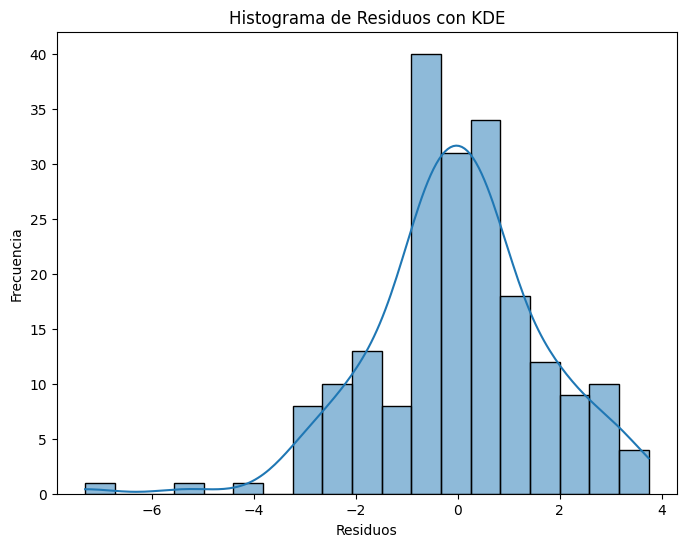

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True)
plt.title('Histograma de Residuos con KDE')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

###**Homocedasticidad**

**1. Grafica los residuos contra los valores predichos**

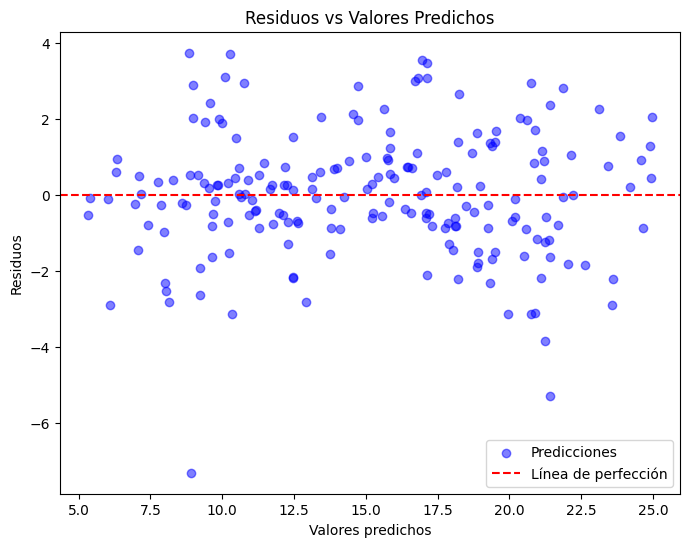

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.5, color='blue', label='Predicciones')
plt.axhline(y=0, color='red', linestyle='--', label='Línea de perfección')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.legend()
plt.show()

###**Q-Q Plot**

**1. Graficar el Q-Q Plot**

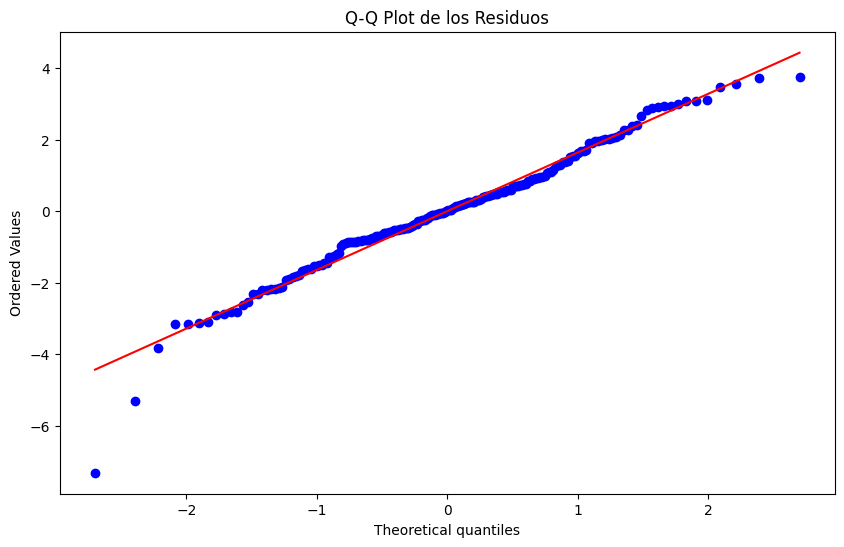

In [73]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos")
plt.show()

###**Evaluación del Modelo**

**1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)**

In [74]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 2.7061
RMSE: 1.6450
R²: 0.9026


###**Visualización de Predicciones**

**1. Crea un gráfico comparando Sales reales vs Sales predichas**

**2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste**

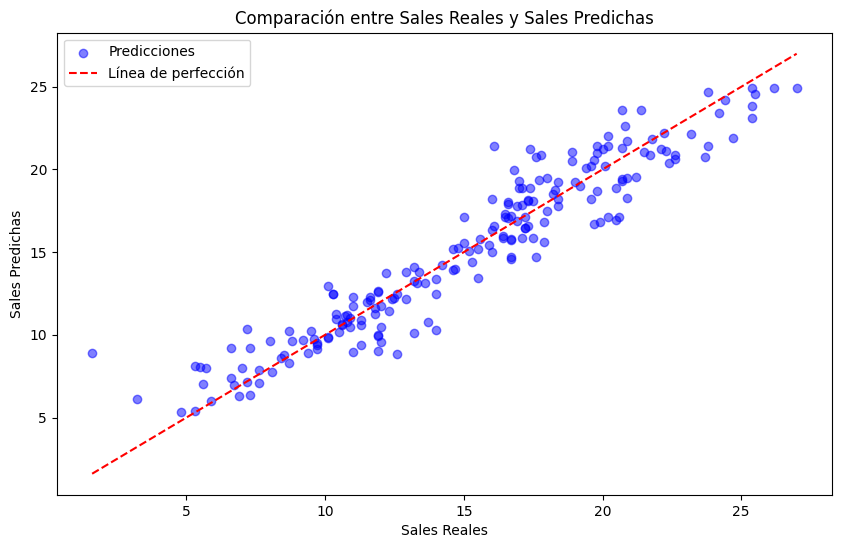

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de perfección')
plt.title("Comparación entre Sales Reales y Sales Predichas")
plt.xlabel("Sales Reales")
plt.ylabel("Sales Predichas")
plt.legend()
plt.show()

###**Verificar el impacto de los atributos en el modelo**

**Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p**

In [76]:
X_scaled_with_constant = sm.add_constant(X_scaled)
model_sm = sm.OLS(y, X_scaled_with_constant).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Thu, 03 Apr 2025   Prob (F-statistic):          2.39e-100
Time:                        08:20:58   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    129.098      0.0

##***7. Conclusiones***

**¿Cuál de los tres modelos construidos fue el mejor?**
  
El modelo (sin variables que no muestran una relación lineal) fue el mejor a que hubo algunos cambios en la predicción y los resultados obtenidos fueron más exactos y confiables.


**¿Cuál fue el atributo que más influencia tiene en las ventas?**

El atributo con más influencia fue la TV.